# Obteniendo el movie xyz de los solventes

In [4]:
import sys
import pandas as pd
sys.path.append("../code/")
from solventes import *
import time

to = time.time()

solv = solventes()
path_grl0 = "/disco2/SIMS/aots/"
path_grl0_out = "../data/"

s1 = "aot-dmf-2-good"
s2 = "aot-agua2"
s3 = "aot-dms-2"
s4 = "aot-eg-2"
s5 = "aot-gl-2"
s6 = "aot-forma-from-min"

carpets = [s1, s2, s3, s4, s5, s6]

for carpet in carpets:

    to = time.time()

    path_file = os.path.join(path_grl0, carpet, "salida.out")
    name_movie = f"movie_{carpet}.xyz"
    path_movie = os.path.join(path_grl0_out, name_movie)
    
    solv.get_xyz_movie(path_file=path_file,
                       path_movie=path_movie)

    print(f"DONE: {carpet} ; {time.time()-to}")


                               

DONE: aot-dmf-2-good ; 2.0344576835632324
DONE: aot-agua2 ; 1.6226792335510254
DONE: aot-dms-2 ; 1.9458801746368408
DONE: aot-eg-2 ; 2.154804229736328
DONE: aot-gl-2 ; 2.1227476596832275
DONE: aot-forma-from-min ; 1.771848201751709


# Creando los pairwise rmsd

In [6]:
s1.split("-")[1]

'dmf'

In [13]:
import MDAnalysis as mda
import time
from MDAnalysis.analysis import diffusionmap, align, rms
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
import pandas as pd
%matplotlib inline

to = time.time()

path_grl0 = "../data/"

s1 = "aot-dmf-2-good"
s2 = "aot-agua2"
s3 = "aot-dms-2"
s4 = "aot-eg-2"
s5 = "aot-gl-2"
s6 = "aot-forma-from-min"
carpets = [s1, s2, s3, s4, s5, s6]

for carpet in carpets:

    to = time.time()

    name_movie = f"movie_{carpet}.xyz"
    path_movie = os.path.join(path_grl0, name_movie)    
    
    u = mda.Universe(path_movie)
    sel = u.select_atoms("all")
    
    N = sel.n_atoms
    select = f"index 23:{N-1}"
    
    aligner = align.AlignTraj(u, u, in_memory=True).run()
    matrix = diffusionmap.DistanceMatrix(u, select=select).run()

    nme = carpet.split("-")[1]
    name_matrix = f"md-rmsd-only-{nme}"
    path_save = os.path.join(path_grl0, name_matrix)
    np.save(path_save, matrix.results.dist_matrix)

    print(f"DONE: {carpet} ; {time.time()-to}")


DONE: aot-dmf-2-good ; 9.666454792022705
DONE: aot-agua2 ; 9.623631000518799
DONE: aot-dms-2 ; 9.817159414291382
DONE: aot-eg-2 ; 9.725525140762329
DONE: aot-gl-2 ; 9.737322807312012
DONE: aot-forma-from-min ; 9.640790939331055


In [9]:
carpet.split("-")[1]

'forma'

# Haciendo las graficas

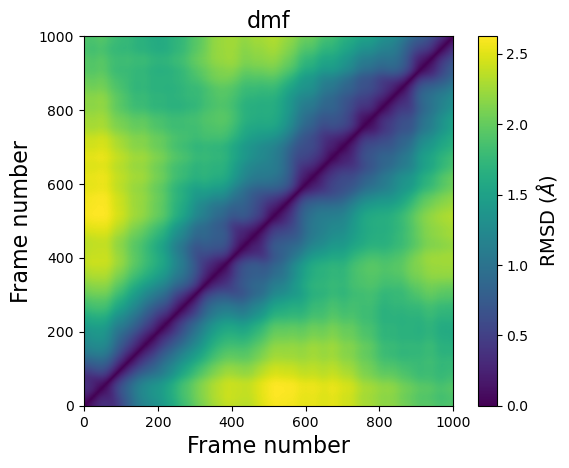

DONE: aot-dmf-2-good ; 0.18771600723266602


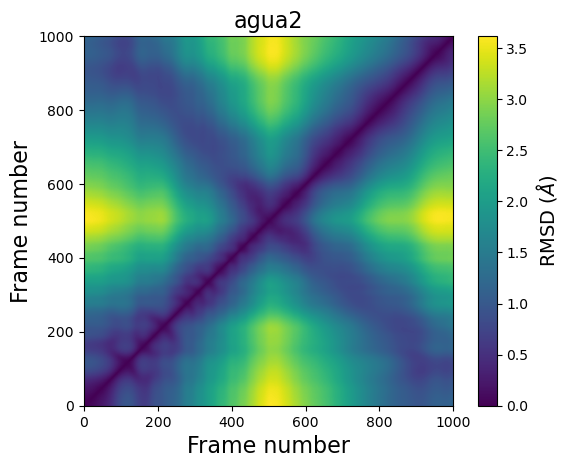

DONE: aot-agua2 ; 0.19893431663513184


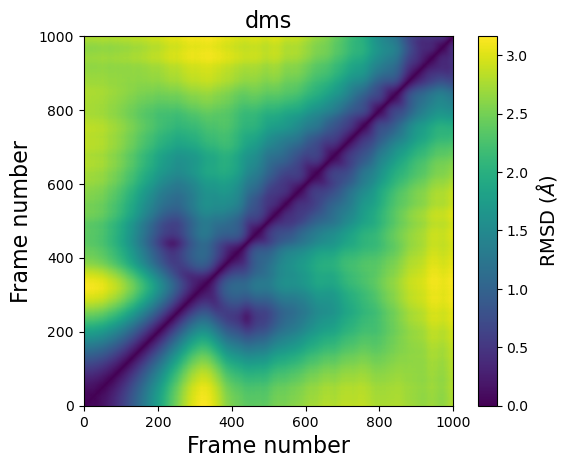

DONE: aot-dms-2 ; 0.191817045211792


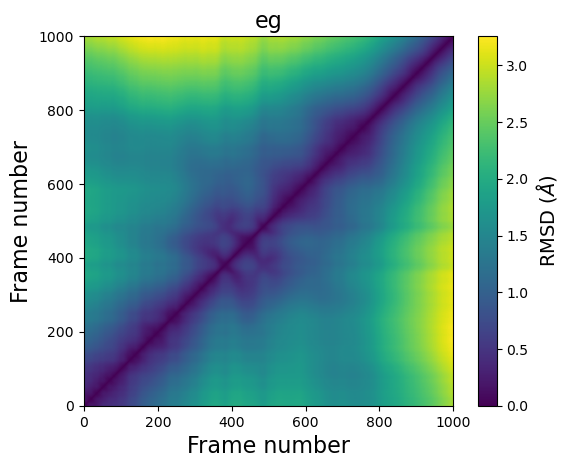

DONE: aot-eg-2 ; 0.1893000602722168


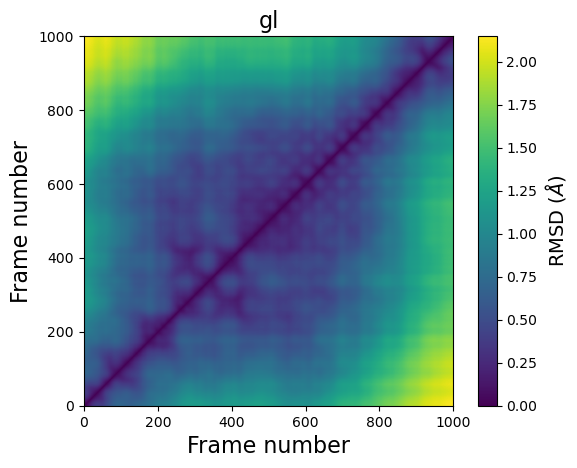

DONE: aot-gl-2 ; 0.19976043701171875


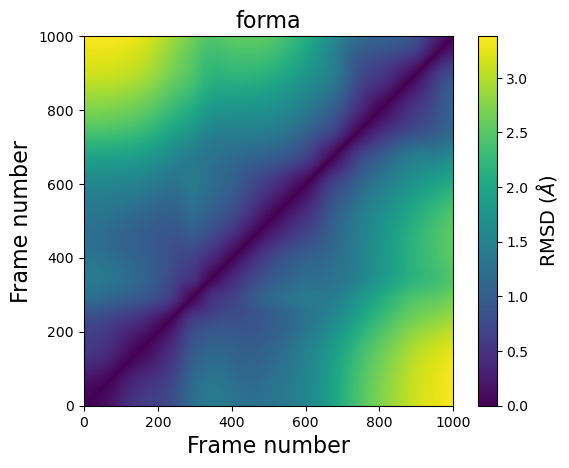

DONE: aot-forma-from-min ; 0.1838057041168213


In [19]:
import MDAnalysis as mda
import time
from MDAnalysis.analysis import diffusionmap, align, rms
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
import pandas as pd
%matplotlib inline

path_grl0 = "../data/"

s1 = "aot-dmf-2-good"
s2 = "aot-agua2"
s3 = "aot-dms-2"
s4 = "aot-eg-2"
s5 = "aot-gl-2"
s6 = "aot-forma-from-min"
carpets = [s1, s2, s3, s4, s5, s6]

for carpet in carpets:

    to = time.time()

    nme = carpet.split("-")[1]
    name_matrix = f"md-rmsd-only-{nme}.npy"
    path_load = os.path.join(path_grl0, name_matrix)

    b = np.load(path_load)

    plt.imshow(b, cmap='viridis')
    plt.xlabel('Frame number', fontsize=16)
    plt.ylabel('Frame number', fontsize=16)
    plt.colorbar(label=r'RMSD ($\AA$)')
    plt.title(nme, fontsize=16)
    
    lx = [0, 200, 400, 600, 800, 1000]
    lxs = [str(a) for a in lx]
    plt.xticks(lx, lxs)
    plt.yticks(lx, lxs)
    
    ax = plt.gca()
    ax.invert_yaxis()
    
    cbar_axes = ax.figure.axes[-1]
    ax.figure.axes[-1].yaxis.label.set_size(14)
    
    plt.show()

    

    print(f"DONE: {carpet} ; {time.time()-to}")


# graficando señalando el minimo

In [5]:
import sys
import pandas as pd
sys.path.append("../code/")
from solventes import *
import time
from collections import defaultdict

to = time.time()

solv = solventes()
path_grl0 = "/disco2/SIMS/aots/"
path_grl0_out = "../data/"

s1 = "aot-dmf-2-good"
s2 = "aot-agua2"
s3 = "aot-dms-2"
s4 = "aot-eg-2"
s5 = "aot-gl-2"
s6 = "aot-forma-from-min"

carpets = [s1, s2, s3, s4, s5, s6]

dic = defaultdict(dict)
for carpet in carpets:

    to = time.time()

    path_file = os.path.join(path_grl0, carpet, "salida.out")
    
    dfe, dfxyz = solv.get_energies_df(path_file=path_file,
                         label="label")

    name_min_conf = f"min_conf_{carpet}.xyz"
    path_min = os.path.join(path_grl0_out, name_min_conf)   

    tmp_df = dfxyz[dfxyz["frame"] == dfe.loc[dfe[['energy']].idxmin()].index[0]].copy()
    tmp_df.loc[:,'ida'] = tmp_df['ida'].astype(int)
    tmp_df = tmp_df.set_index('ida')

    f = open(path_min, 'w')
    
    f.write(f"{len(tmp_df)}\n")
    f.write(f"{carpet}\n")

    for idx in tmp_df.index:
        
        symbol = tmp_df["atom"].loc[idx]
        x, y, z = tmp_df[["x", "y", "z"]].loc[idx].values
        txt = f"{symbol:<10}{x:.7f}{y:15.7f}{z:15.7f}\n"
        # print(f"{symbol:<10}{x:.7f}{y:15.7f}{z:15.7f}")
        f.write(txt)
    f.close()

    dic["min_frame"][carpet] = dfe[['energy']].idxmin()[0]

    print(f"DONE: {carpet} ; {time.time()-to}")


path_min = os.path.join(path_grl0_out, "min_frames_solventes.pkl")  
df = pd.DataFrame(dic)
df.to_pickle(path_min)




DONE: aot-dmf-2-good ; 1.5361263751983643
DONE: aot-agua2 ; 1.2960357666015625
DONE: aot-dms-2 ; 1.4802539348602295
DONE: aot-eg-2 ; 1.471341848373413
DONE: aot-gl-2 ; 1.599701166152954
DONE: aot-forma-from-min ; 1.3891665935516357


In [6]:
df

,min_frame
aot-agua2,287
aot-dmf-2-good,197
aot-dms-2,865
aot-eg-2,470
aot-forma-from-min,375
aot-gl-2,964


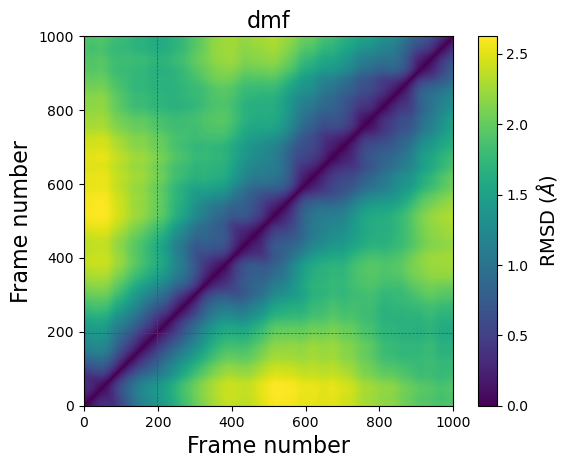

DONE: aot-dmf-2-good ; 0.1908261775970459


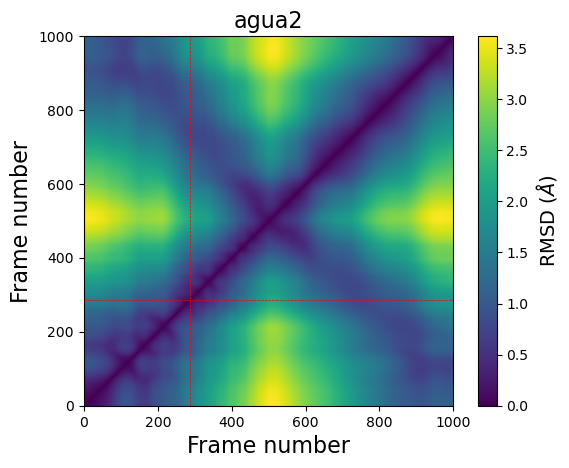

DONE: aot-agua2 ; 0.20158863067626953


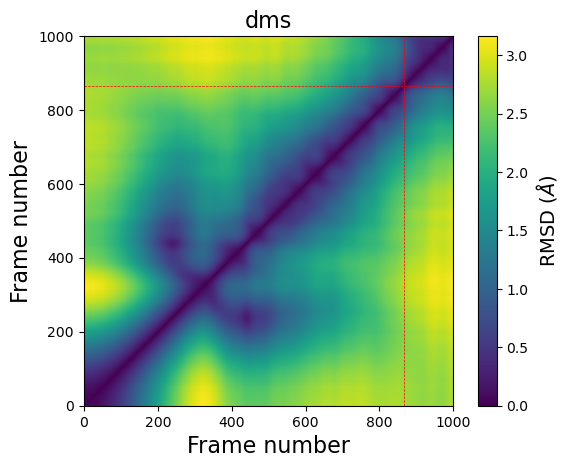

DONE: aot-dms-2 ; 0.19552874565124512


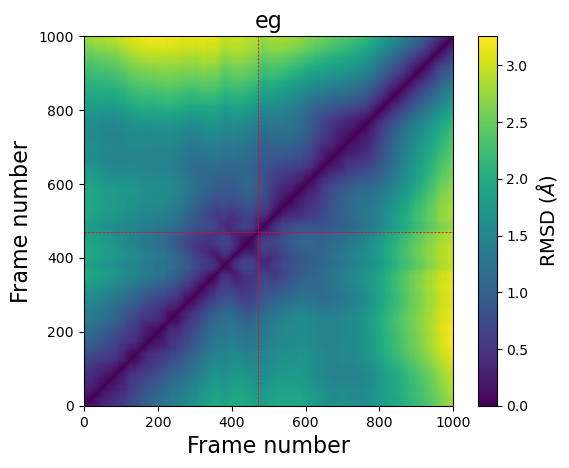

DONE: aot-eg-2 ; 0.19432735443115234


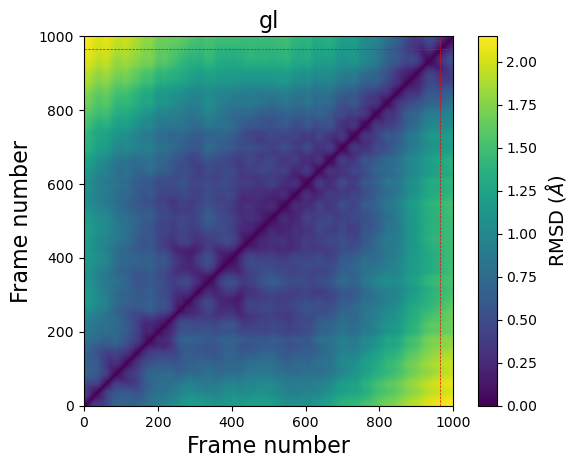

DONE: aot-gl-2 ; 0.20123648643493652


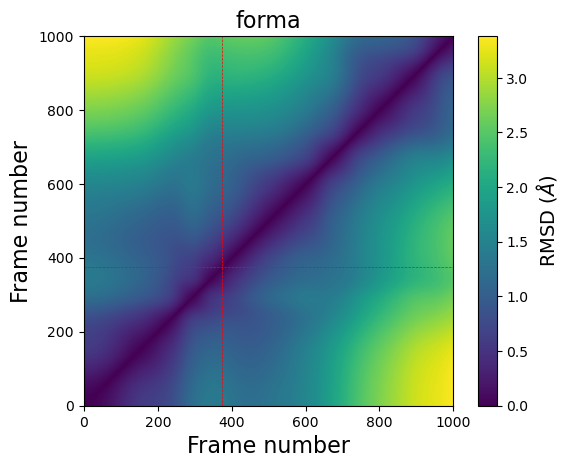

DONE: aot-forma-from-min ; 0.18466711044311523


In [9]:
import MDAnalysis as mda
import time
from MDAnalysis.analysis import diffusionmap, align, rms
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
import pandas as pd
%matplotlib inline

path_grl0 = "../data/"

s1 = "aot-dmf-2-good"
s2 = "aot-agua2"
s3 = "aot-dms-2"
s4 = "aot-eg-2"
s5 = "aot-gl-2"
s6 = "aot-forma-from-min"
carpets = [s1, s2, s3, s4, s5, s6]


path_min = os.path.join(path_grl0, "min_frames_solventes.pkl")  
dfmins = pd.read_pickle(path_min)

for carpet in carpets:

    to = time.time()

    nme = carpet.split("-")[1]
    name_matrix = f"md-rmsd-only-{nme}.npy"
    path_load = os.path.join(path_grl0, name_matrix)

    b = np.load(path_load)

    plt.imshow(b, cmap='viridis')
    plt.xlabel('Frame number', fontsize=16)
    plt.ylabel('Frame number', fontsize=16)
    plt.colorbar(label=r'RMSD ($\AA$)')
    plt.title(nme, fontsize=16)

    idxmin = dfmins["min_frame"].loc[carpet]
    plt.axhline(y = idxmin, color = 'r', linestyle = '--', linewidth=0.5)     
    plt.axvline(x = idxmin, color = 'r', linestyle = '--', linewidth=0.5)     
    
    lx = [0, 200, 400, 600, 800, 1000]
    lxs = [str(a) for a in lx]
    plt.xticks(lx, lxs)
    plt.yticks(lx, lxs)
    
    ax = plt.gca()
    ax.invert_yaxis()
    
    cbar_axes = ax.figure.axes[-1]
    ax.figure.axes[-1].yaxis.label.set_size(14)

    
    
    plt.show()

    

    print(f"DONE: {carpet} ; {time.time()-to}")
